# Considering the Internal pump leakage as Target Variable:


##### This notebook considers Internal pump leakage as target variable and uses feature selection methods to select top features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis,skew,iqr   
import plotly.express as px

sns.set_style("darkgrid")

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('../data/processed_data/final_df.csv')

In [3]:
df_target=pd.read_csv('../data/processed_data/target_df.csv')

In [4]:
df

PS1_mean  PS1_median  PS1_min  PS1_max    PS1_std  PS1_kurtosis  \
0     160.673492      156.25   145.83   191.51  13.939309      0.495566   
1     160.603320      156.06   145.73   191.47  14.118967      0.460174   
2     160.347720      155.72   145.37   191.41  14.192619      0.464134   
3     160.188088      155.56   145.14   191.34  14.227803      0.470640   
4     160.000472      155.34   144.95   191.41  14.276434      0.481844   
...          ...         ...      ...      ...        ...           ...   
2200  161.227572      156.59   146.69   191.81  13.987129      0.462507   
2201  161.206070      156.55   146.64   191.81  14.001418      0.458705   
2202  161.192120      156.56   146.63   191.84  13.988350      0.461996   
2203  161.208917      156.58   146.65   191.77  13.985248      0.463266   
2204  161.217128      156.60   146.57   191.69  13.984674      0.455709   

      PS1_skewness  PS1_iqr    PS2_mean  PS2_median  ...  CP_skewness  \
0         1.273048  15.1200  109.466914     129.365  ...    -0.345513   
1         1.278690  15.1300  109.354890     129.385  ...     0.402252   
2         1.282851  15.2800  109.158845     129.325  ...     0.245656   
3         1.286353  15.3100  109.064807     128.865  ...    -0.027257   
4         1.292315  15.3000  108.931434     129.000  ...    -0.482068   
...            ...      ...         ...         ...  ...          ...   
2200      1.291810  14.4300  109.779581     130.300  ...    -0.143915   
2201      1.290347  14.4500  109.787481     130.275  ...    -0.047794   
2202      1.290762  14.4300  109.756174     130.250  ...     0.045058   
2203      1.292470  14.4225  109.793884     130.300  ...    -0.041004   
2204      1.287925  14.4700  109.792177     130.340  ...     0.410573   

       CP_iqr    SE_mean  SE_median  SE_min  SE_max     SE_std  SE_kurtosis  \
0     0.52700  59.157183    68.5145     0.0  79.568  23.763984     2.339639   
1     0.12150  59.335617    68.5360     0.0  80.441  23.857918     2.322487   
2     0.03275  59.543150    68.8530     0.0  80.824  23.923381     2.338352   
3     0.03150  59.794900    69.0060     0.0  80.930  24.023005     2.338694   
4     0.03050  59.455267    69.0130     0.0  81.100  23.972262     2.268655   
...       ...        ...        ...     ...     ...        ...          ...   
2200  0.02750  59.033100    68.4505     0.0  77.752  23.635352     2.405264   
2201  0.03625  59.068000    68.4075     0.0  77.592  23.638396     2.414648   
2202  0.04525  59.132350    68.3130     0.0  77.773  23.633405     2.441802   
2203  0.02625  58.970800    68.3500     0.0  77.568  23.600817     2.413508   
2204  0.04050  59.053900    68.3705     0.0  77.748  23.627226     2.419783   

      SE_skewness  SE_iqr  
0       -2.030801   1.232  
1       -2.022689   1.496  
2       -2.027789   1.556  
3       -2.028969   1.283  
4       -2.000267   1.477  
...           ...     ...  
2200    -2.055932   1.399  
2201    -2.059495   1.223  
2202    -2.069487   1.298  
2203    -2.059104   1.220  
2204    -2.061135   1.255  

[2205 rows x 136 columns]

In [5]:
df_target

Cooler condition / %   Valve condition / %  Internal pump leakage  \
0                        3                   100                      0   
1                        3                   100                      0   
2                        3                   100                      0   
3                        3                   100                      0   
4                        3                   100                      0   
...                    ...                   ...                    ...   
2200                   100                   100                      0   
2201                   100                   100                      0   
2202                   100                   100                      0   
2203                   100                   100                      0   
2204                   100                   100                      0   

      Hydraulic accumulator / bar  stable flag  
0                             130            1  
1                             130            1  
2                             130            1  
3                             130            1  
4                             130            1  
...                           ...          ...  
2200                           90            0  
2201                           90            0  
2202                           90            0  
2203                           90            0  
2204                           90            0  

[2205 rows x 5 columns]

In [6]:
df_pump= pd.concat([df,df_target['Internal pump leakage']],axis=1)

In [7]:
df_pump.head()

PS1_mean  PS1_median  PS1_min  PS1_max    PS1_std  PS1_kurtosis  \
0  160.673492      156.25   145.83   191.51  13.939309      0.495566   
1  160.603320      156.06   145.73   191.47  14.118967      0.460174   
2  160.347720      155.72   145.37   191.41  14.192619      0.464134   
3  160.188088      155.56   145.14   191.34  14.227803      0.470640   
4  160.000472      155.34   144.95   191.41  14.276434      0.481844   

   PS1_skewness  PS1_iqr    PS2_mean  PS2_median  ...   CP_iqr    SE_mean  \
0      1.273048    15.12  109.466914     129.365  ...  0.52700  59.157183   
1      1.278690    15.13  109.354890     129.385  ...  0.12150  59.335617   
2      1.282851    15.28  109.158845     129.325  ...  0.03275  59.543150   
3      1.286353    15.31  109.064807     128.865  ...  0.03150  59.794900   
4      1.292315    15.30  108.931434     129.000  ...  0.03050  59.455267   

   SE_median  SE_min  SE_max     SE_std  SE_kurtosis  SE_skewness  SE_iqr  \
0    68.5145     0.0  79.568  23.763984     2.339639    -2.030801   1.232   
1    68.5360     0.0  80.441  23.857918     2.322487    -2.022689   1.496   
2    68.8530     0.0  80.824  23.923381     2.338352    -2.027789   1.556   
3    69.0060     0.0  80.930  24.023005     2.338694    -2.028969   1.283   
4    69.0130     0.0  81.100  23.972262     2.268655    -2.000267   1.477   

   Internal pump leakage  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 137 columns]

In [8]:
df_pump['Internal pump leakage']=df_pump['Internal pump leakage'].astype('category')

In [9]:
df_pump['Internal pump leakage']=df_pump['Internal pump leakage'].map({0:'no leakage',1:'weak leakage',2:'severe leakage'})

In [10]:
df_pump['Internal pump leakage'].value_counts()

no leakage        1221
weak leakage       492
severe leakage     492
Name: Internal pump leakage, dtype: int64

### Considering ANOVA feature selection method as Input is Numerical and Output is Categorical

In [11]:
def feature_scaling(df,target):
    '''Preprocessing and Feature Scaling
    Parameters:
    df: Dataframe with features and defect that needs to be scaled
    Output:Returns two data frames X(features) and y(labels)'''
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    import numpy as np
    
    # preprocessing using standard scaler
    scaler=StandardScaler()
    
    # Dividing data into features(X) and labels(y)
    X=df.drop(target,axis=1)
    y=df[target]
    
    #Scaling features by using StandardScaler
    X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    
    return X,y

In [12]:
X,y = feature_scaling(df_pump,'Internal pump leakage')

In [13]:
from sklearn.feature_selection import f_classif,SelectKBest,mutual_info_classif

In [14]:
select_model=SelectKBest(f_classif,k='all')

In [15]:
select_model.fit(X,y)

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 10  18 130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

In [16]:
feature_score=pd.DataFrame({'Feature':X.columns,'Importance':select_model.scores_}).sort_values(by='Importance',ascending=False)

In [17]:
feature_score.describe()

Importance
count  133.000000
mean    54.915198
std     78.890460
min      0.004340
25%      0.870069
50%      7.528538
75%    102.479134
max    342.100756

In [18]:
treshold=feature_score['Importance'].mean()
feature_score_top=feature_score[feature_score['Importance']>treshold]

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


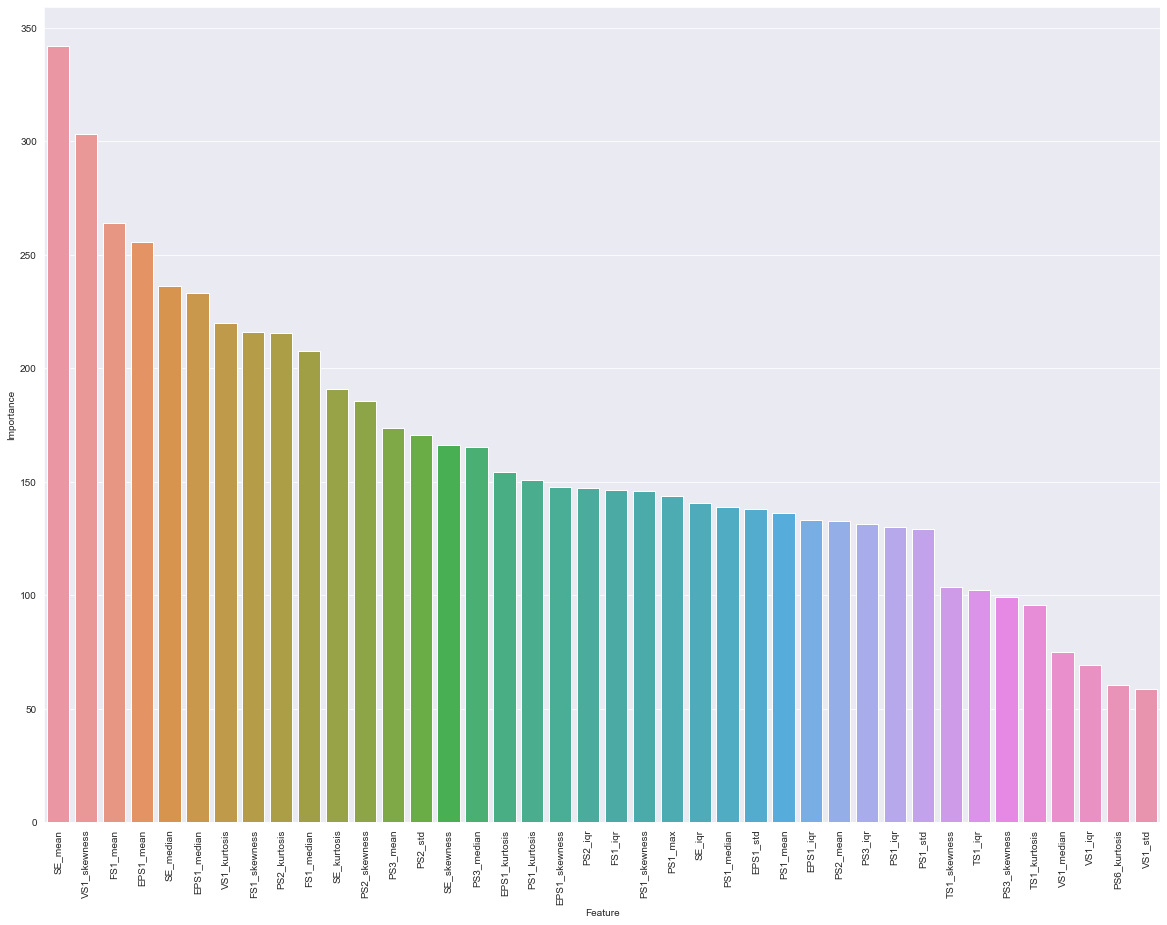

In [19]:
plt.figure(figsize=(20,15))
sns.barplot(feature_score_top['Feature'],feature_score_top['Importance'])
plt.xticks(rotation=90);

In [20]:
df_pump_anova = df_pump[feature_score_top.Feature]
df_pump_anova['Internal pump leakage']=df_pump['Internal pump leakage']

<ipython-input-20-11cb7256e8b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pump_anova['Internal pump leakage']=df_pump['Internal pump leakage']


In [21]:
df_pump_anova

SE_mean  VS1_skewness  FS1_mean    EPS1_mean  SE_median  EPS1_median  \
0     59.157183     -0.044978  6.709815  2538.929167    68.5145       2479.8   
1     59.335617      0.770789  6.715315  2531.498900    68.5360       2470.0   
2     59.543150      0.934103  6.718522  2519.928000    68.8530       2457.4   
3     59.794900      1.007775  6.720565  2511.541633    69.0060       2448.0   
4     59.455267      0.795914  6.690308  2503.449500    69.0130       2440.6   
...         ...           ...       ...          ...        ...          ...   
2200  59.033100      0.941500  6.689930  2543.911033    68.4505       2481.6   
2201  59.068000      0.146576  6.692182  2543.411333    68.4075       2481.6   
2202  59.132350     -0.000037  6.693277  2542.729767    68.3130       2480.6   
2203  58.970800      0.116765  6.684128  2544.046333    68.3500       2481.8   
2204  59.053900      0.739921  6.692302  2543.818300    68.3705       2483.4   

      VS1_kurtosis  FS1_skewness  PS2_kurtosis  FS1_median  ...    PS1_std  \
0        -1.275101     -1.399797      1.508854      7.8360  ...  13.939309   
1        -0.238839     -1.446472      1.511086      7.8530  ...  14.118967   
2        -0.042351     -1.431863      1.508480      7.8470  ...  14.192619   
3        -0.165555     -1.406670      1.507613      7.8430  ...  14.227803   
4         0.027945     -1.422662      1.509724      7.8310  ...  14.276434   
...            ...           ...           ...         ...  ...        ...   
2200      0.072164     -1.387100      1.517597      7.8395  ...  13.987129   
2201     -1.037576     -1.380469      1.518219      7.8340  ...  14.001418   
2202     -0.902634     -1.410821      1.517554      7.8330  ...  13.988350   
2203     -0.312883     -1.382422      1.520136      7.8235  ...  13.985248   
2204     -0.381082     -1.372759      1.519674      7.8370  ...  13.984674   

      TS1_skewness  TS1_iqr  PS3_skewness  TS1_kurtosis  VS1_median  VS1_iqr  \
0         0.037038  0.49875     -0.373579     -1.334003      0.5770  0.05000   
1        -0.291293  1.09750     -0.312814     -1.349416      0.5595  0.03150   
2        -0.452482  1.00075     -0.196023     -1.236851      0.5620  0.04600   
3        -0.543554  0.91575     -0.166201     -1.115968      0.5550  0.04425   
4        -0.512869  0.95750      0.017992     -1.194279      0.5760  0.04425   
...            ...      ...           ...           ...         ...      ...   
2200     -0.727560  0.23075     -0.668354     -0.749753      0.5485  0.03425   
2201     -0.776957  0.19575     -0.654306     -0.498639      0.5425  0.03400   
2202     -0.639716  0.25075     -0.612730     -0.869560      0.5440  0.03650   
2203     -0.660902  0.25700     -0.677827     -0.812144      0.5350  0.02625   
2204     -0.694543  0.24600     -0.659134     -0.776221      0.5405  0.03300   

      PS6_kurtosis   VS1_std  Internal pump leakage  
0        -1.285051  0.027078             no leakage  
1        -0.515116  0.027241             no leakage  
2        -0.507092  0.036729             no leakage  
3        -0.668805  0.033464             no leakage  
4        -0.459002  0.033484             no leakage  
...            ...       ...                    ...  
2200     -0.792293  0.029820             no leakage  
2201     -0.731354  0.021463             no leakage  
2202     -0.739658  0.024047             no leakage  
2203     -0.496249  0.017652             no leakage  
2204     -0.655977  0.022179             no leakage  

[2205 rows x 41 columns]

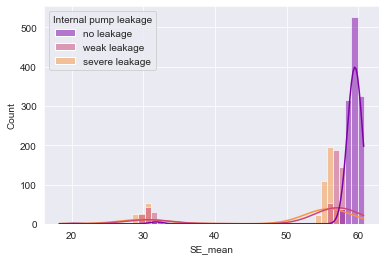

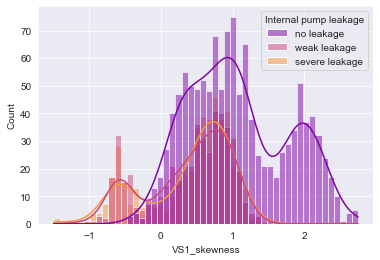

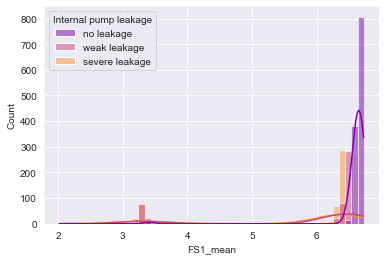

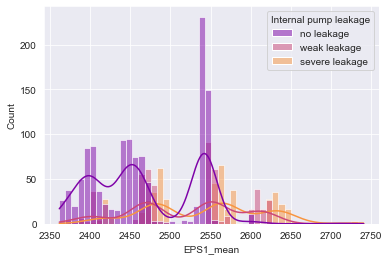

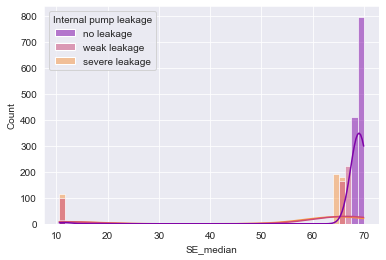

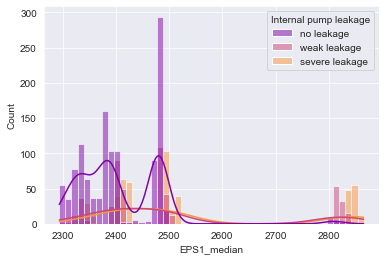

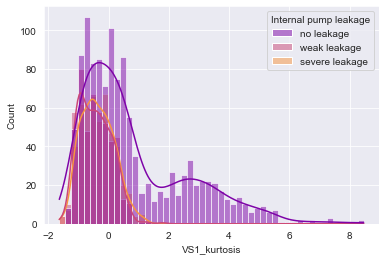

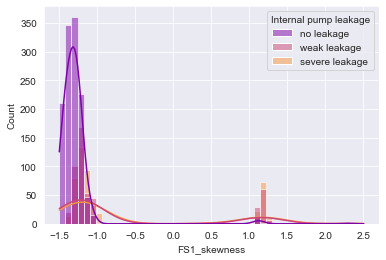

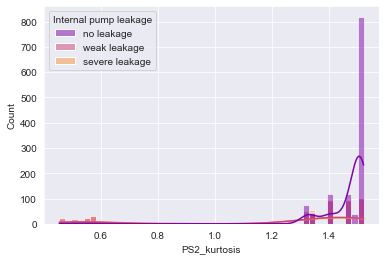

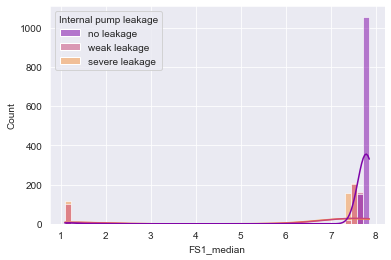

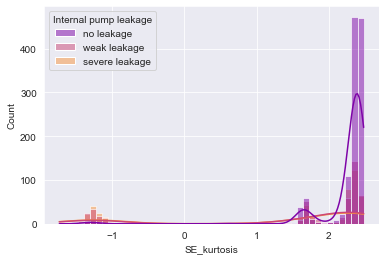

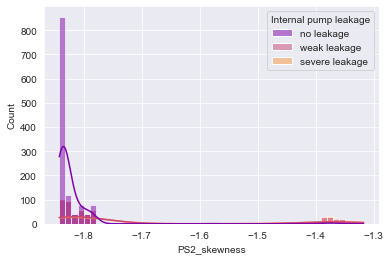

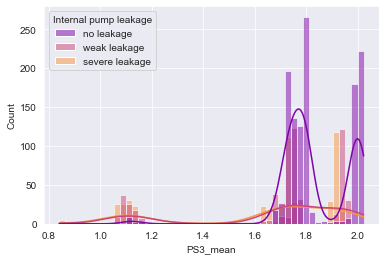

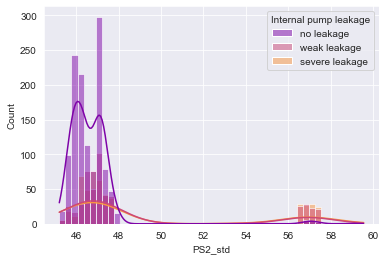

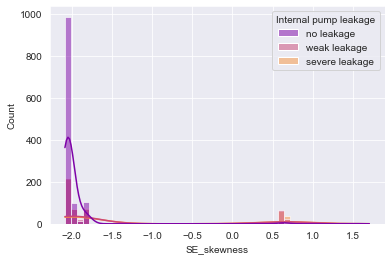

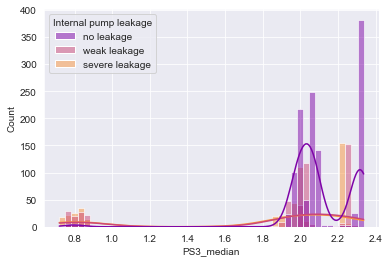

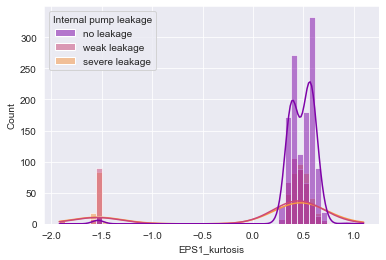

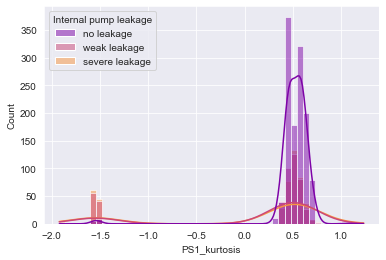

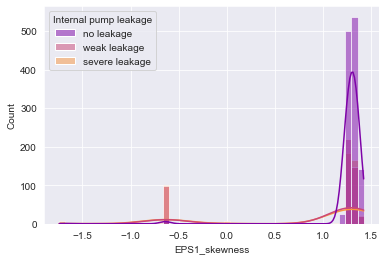

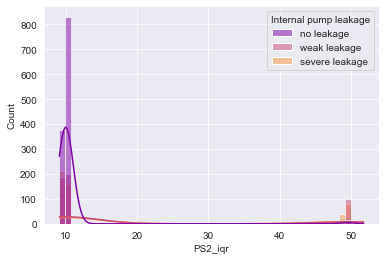

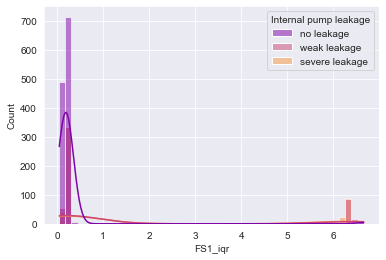

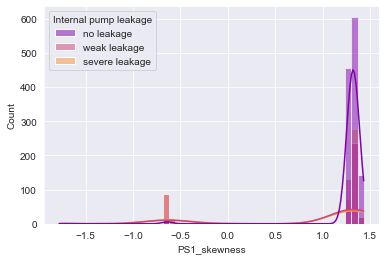

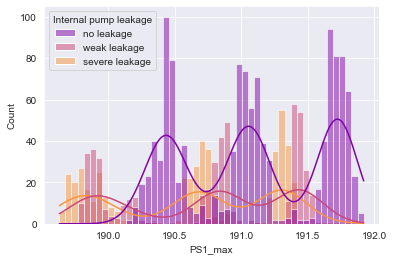

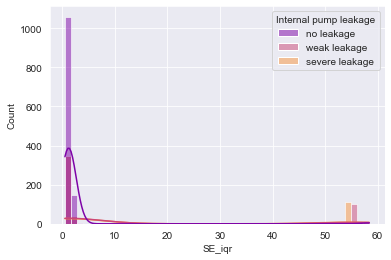

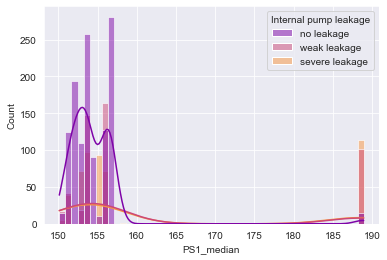

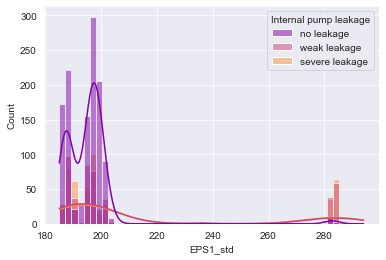

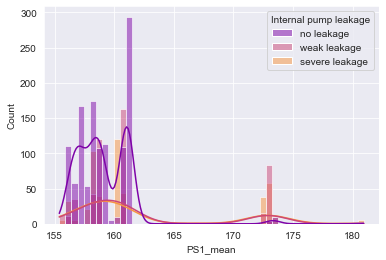

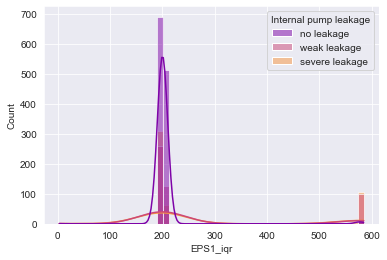

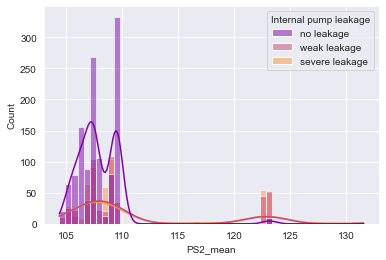

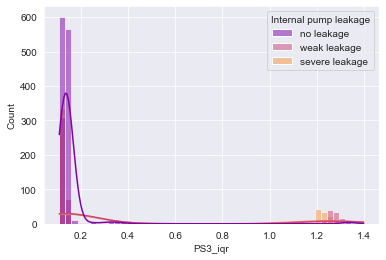

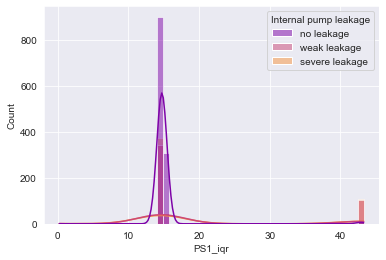

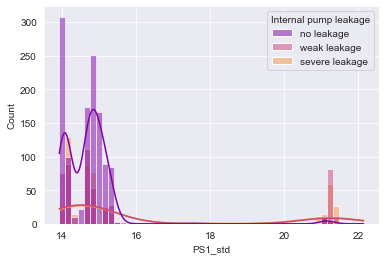

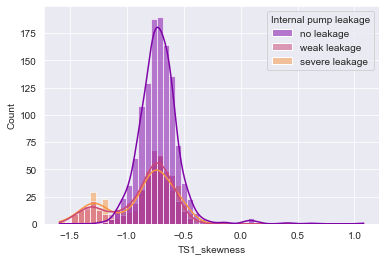

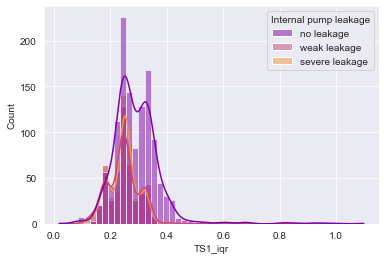

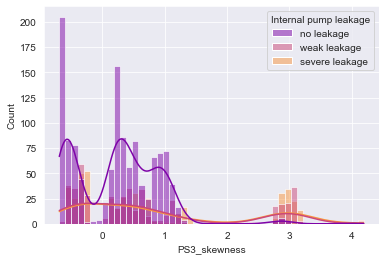

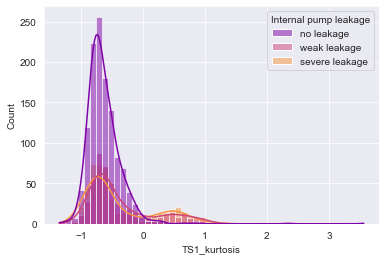

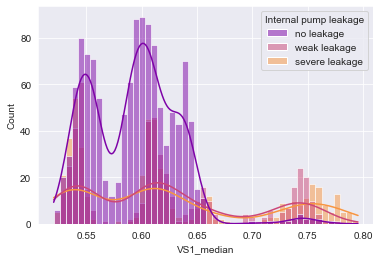

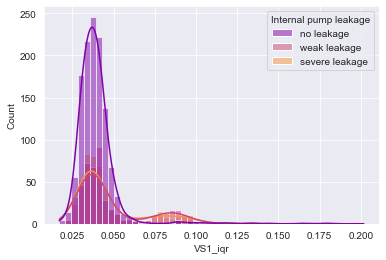

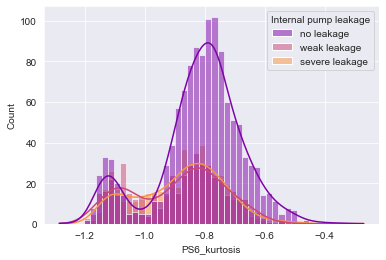

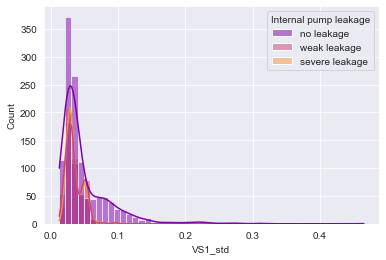

In [22]:
# Plotting Distributions of each feature 

for i in df_pump_anova.drop('Internal pump leakage',axis=1).columns:
    sns.histplot(data=df_pump_anova,x=i,hue='Internal pump leakage',kde=True,bins=50,palette='plasma')
    plt.show()

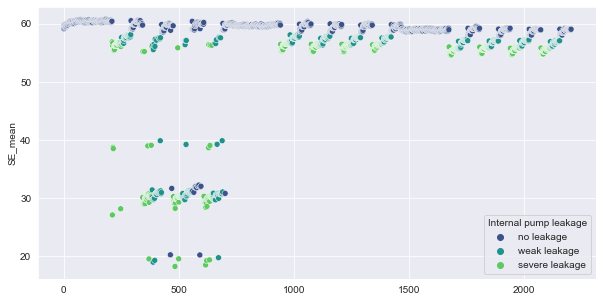

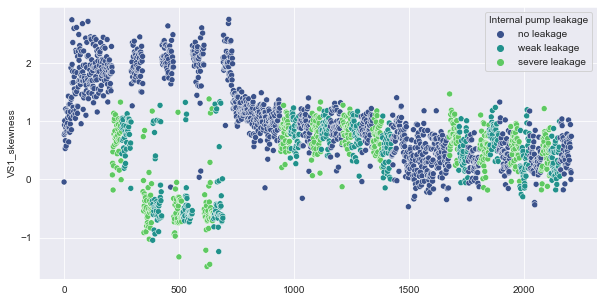

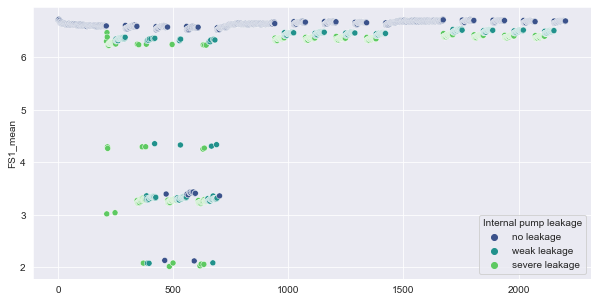

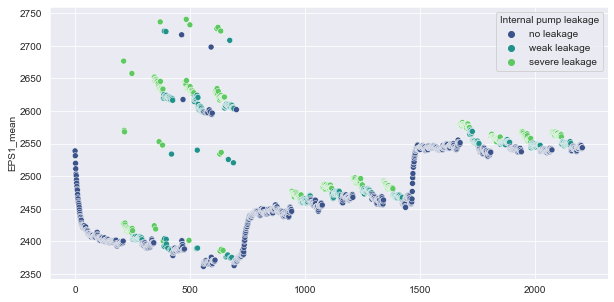

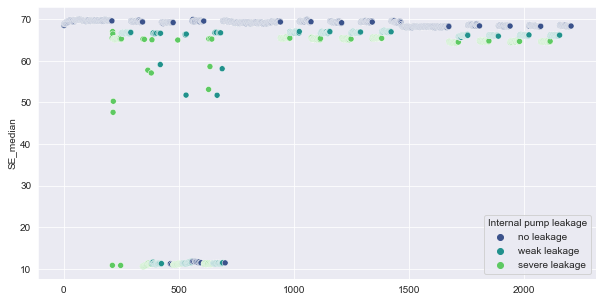

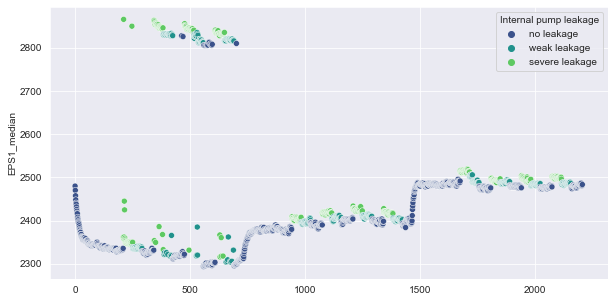

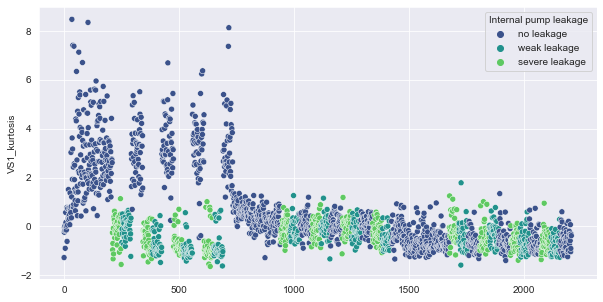

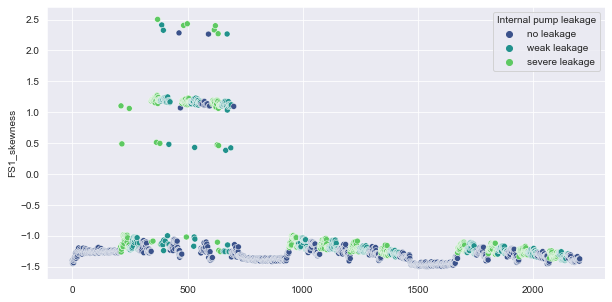

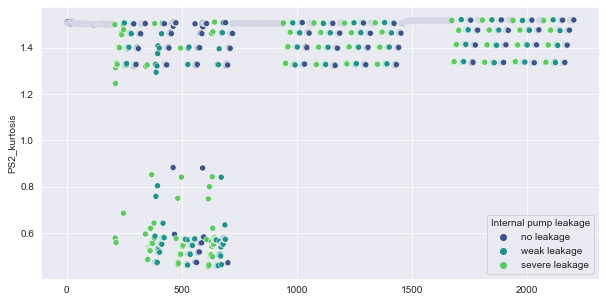

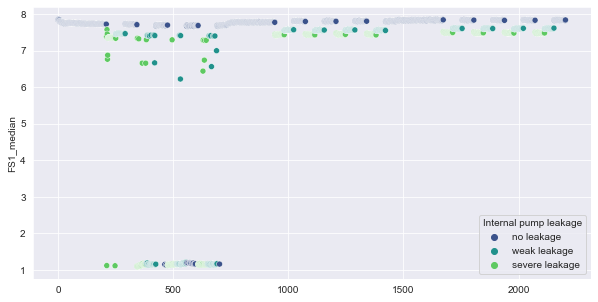

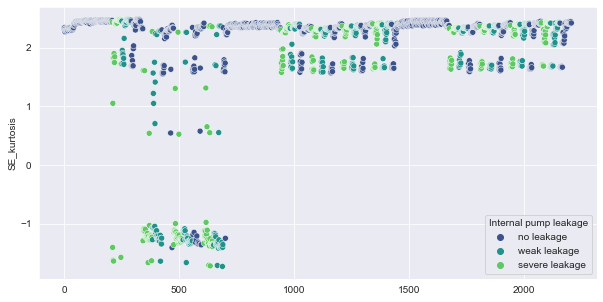

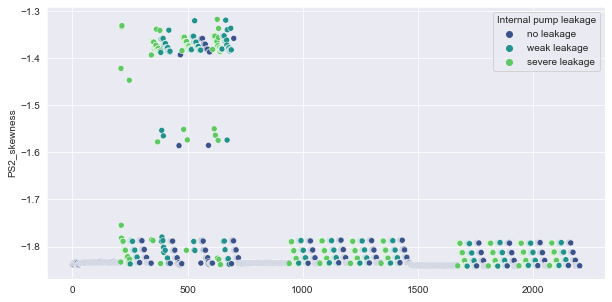

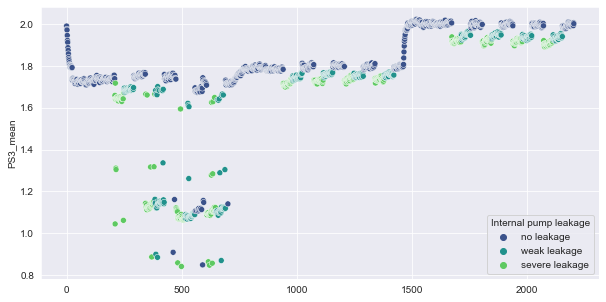

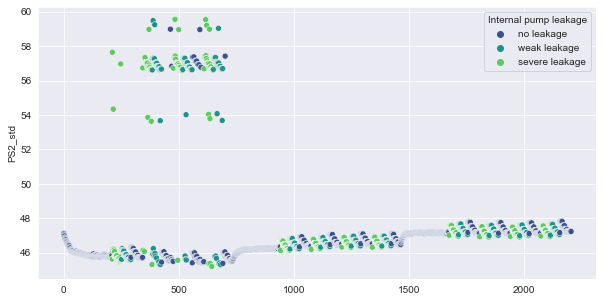

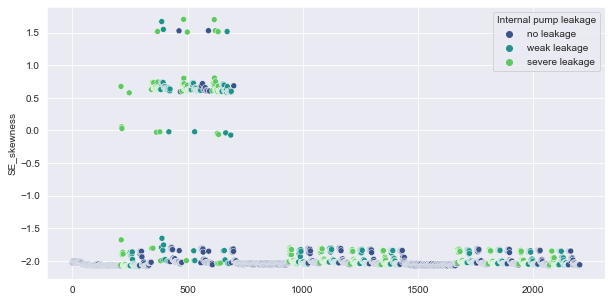

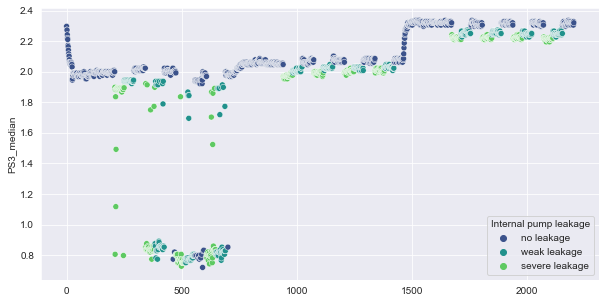

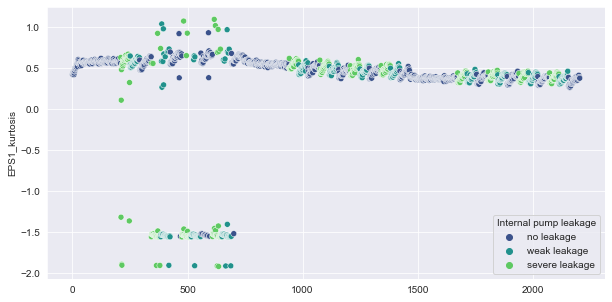

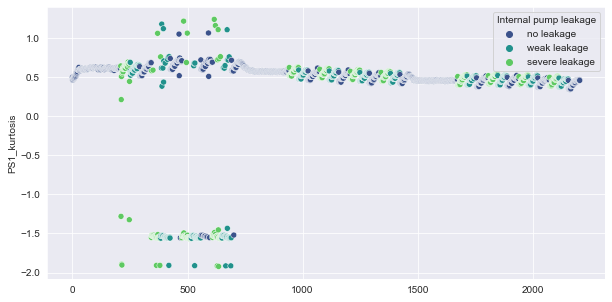

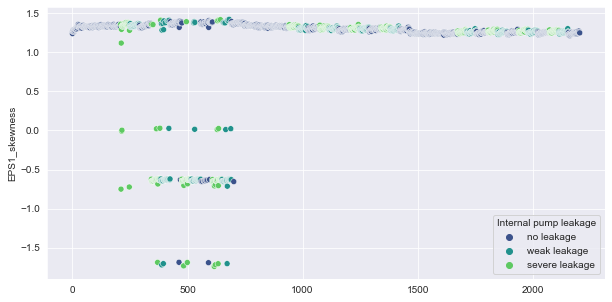

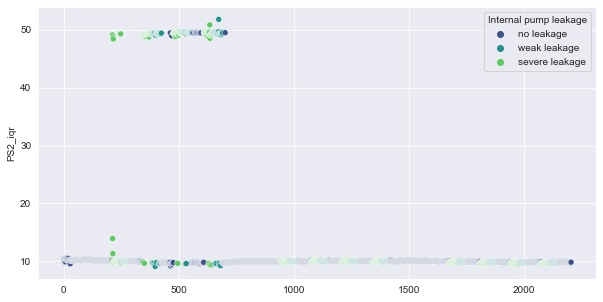

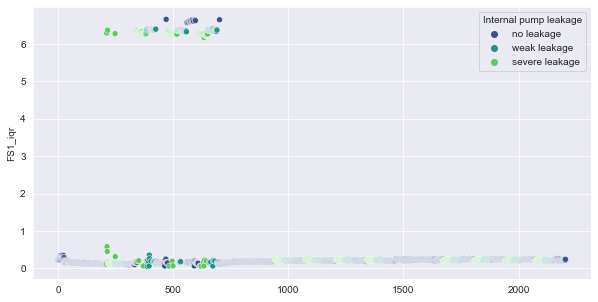

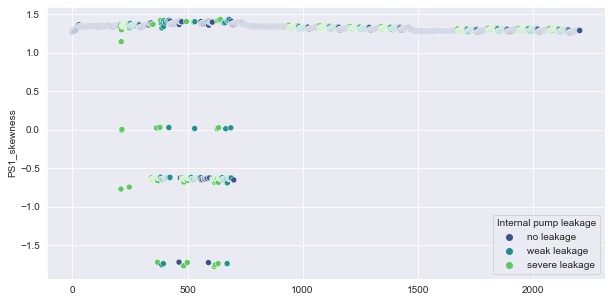

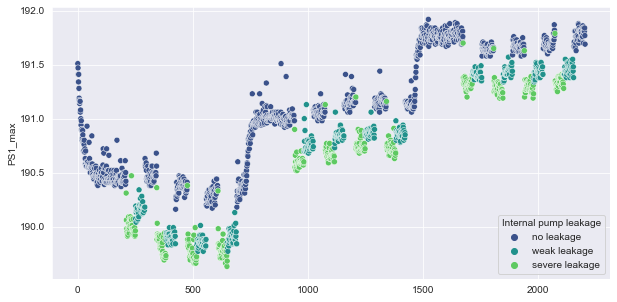

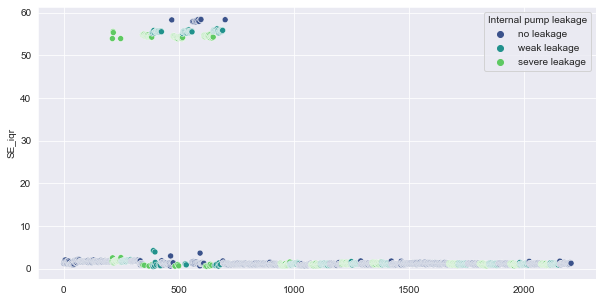

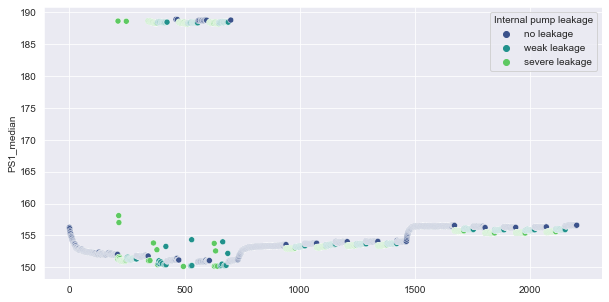

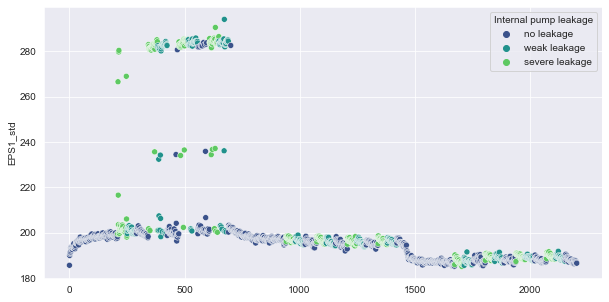

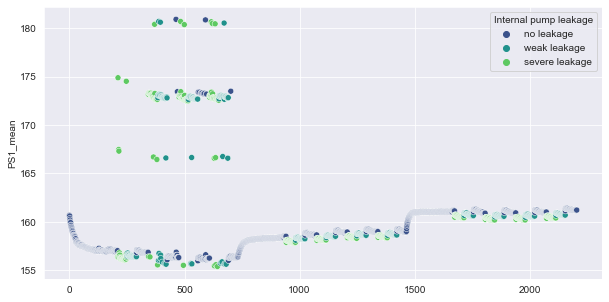

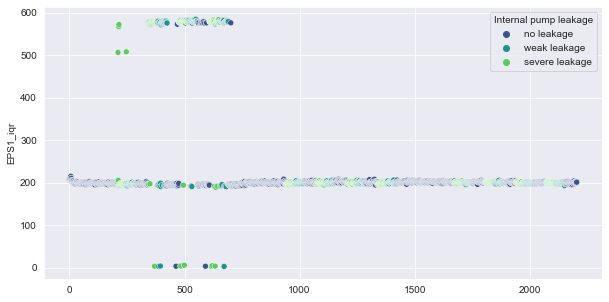

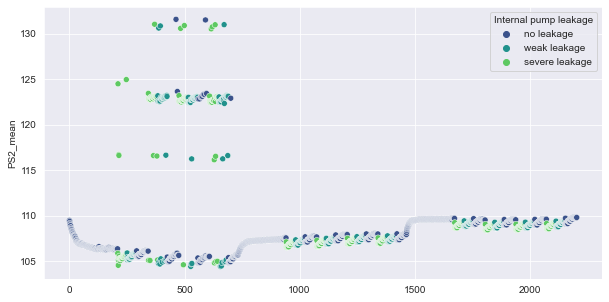

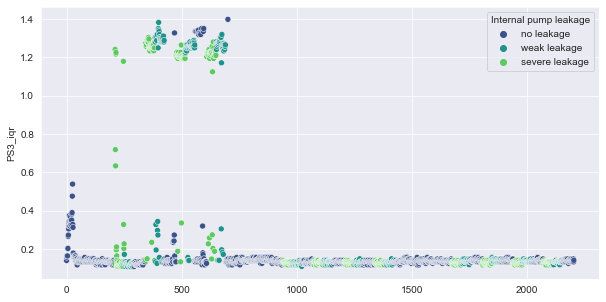

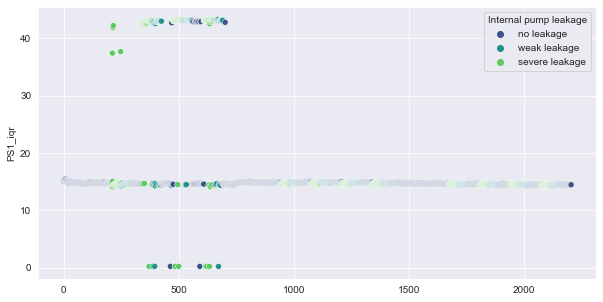

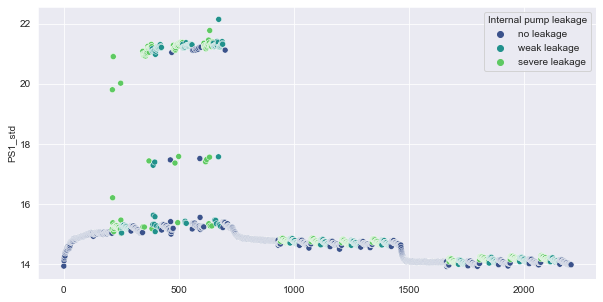

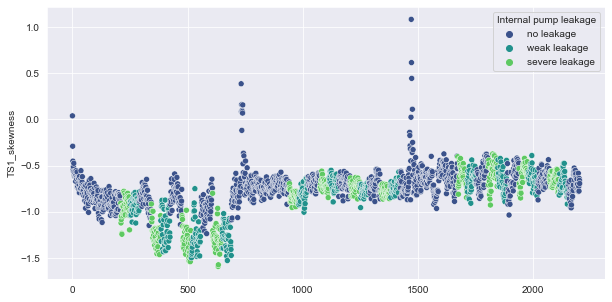

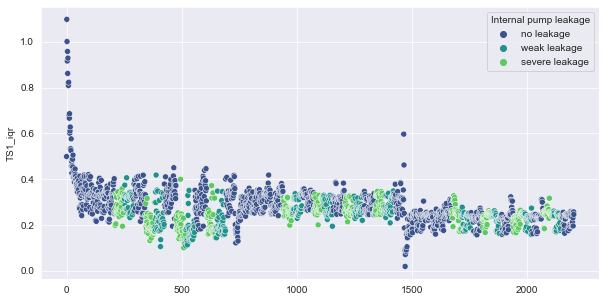

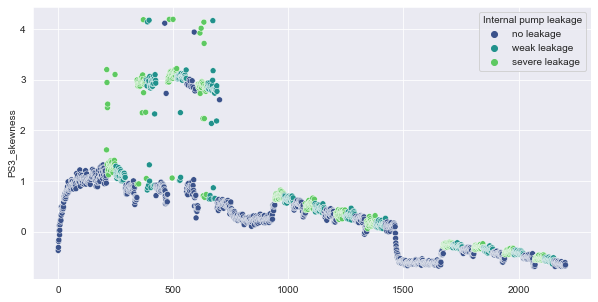

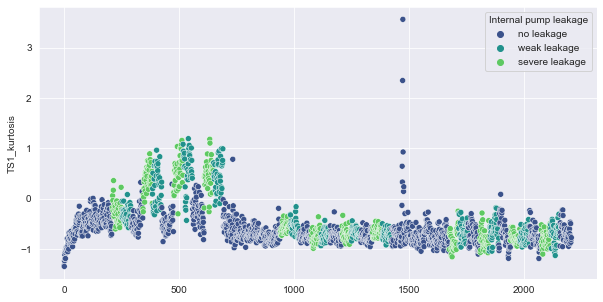

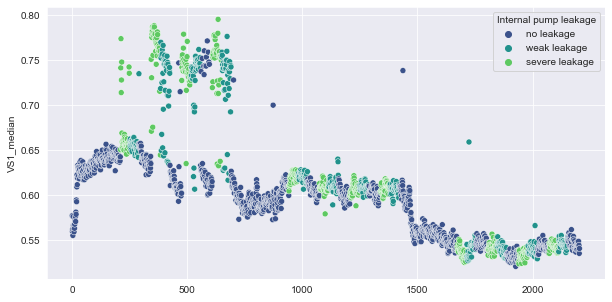

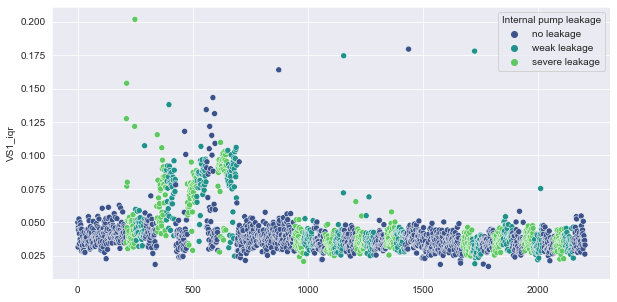

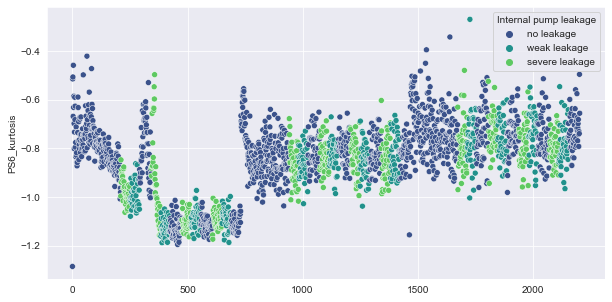

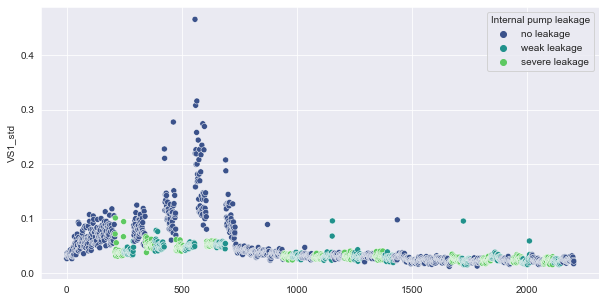

In [23]:

for i in df_pump_anova.drop('Internal pump leakage',axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_pump_anova,y=i,x=df_pump_anova.index,hue='Internal pump leakage',palette='viridis')
    plt.show()

#### Kendall's Feature Selection

In [24]:
from scipy.stats import kendalltau

In [25]:
tau_values=[]
for i in X.columns:
    tau, p_value = kendalltau(X[i], y)
    tau_values.append(tau)

In [26]:
df_tau=pd.DataFrame()

In [27]:
df_tau['Features']=X.columns

In [28]:
df_tau['tau_value']=tau_values

In [29]:
df_tau['tau_value'].max()

0.4390811282933319

In [30]:
df_tau['tau_value'].min()

-0.5608281779967158

In [31]:
threshold=0.2
df_tau_strong=df_tau[(df_tau['tau_value']>threshold) | (df_tau['tau_value']<-threshold)]

In [32]:
df_tau_strong

Features  tau_value
5     PS1_kurtosis  -0.205594
12         PS2_std   0.237890
13    PS2_kurtosis  -0.304252
14    PS2_skewness   0.317889
16        PS3_mean  -0.233158
17      PS3_median  -0.225005
55         TS1_iqr  -0.232968
80        FS1_mean  -0.560828
81      FS1_median  -0.559151
84         FS1_std  -0.249585
86    FS1_skewness   0.439081
87         FS1_iqr   0.245385
101   VS1_kurtosis  -0.299578
102   VS1_skewness  -0.316956
104      EPS1_mean   0.330135
105    EPS1_median   0.317520
109  EPS1_kurtosis  -0.209299
128        SE_mean  -0.553632
129      SE_median  -0.543789
131         SE_max  -0.258880
132         SE_std  -0.283304
133    SE_kurtosis  -0.308219
134    SE_skewness   0.307787

In [33]:
df_pump_tau=df_pump[df_tau_strong['Features']]
df_pump_tau['Internal pump leakage']=df_pump['Internal pump leakage']

<ipython-input-33-51118d03b899>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pump_tau['Internal pump leakage']=df_pump['Internal pump leakage']


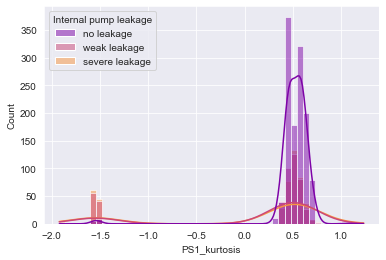

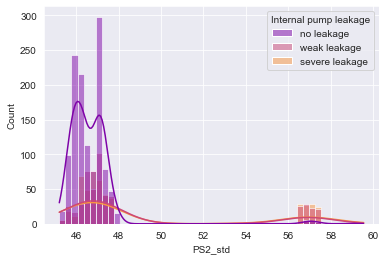

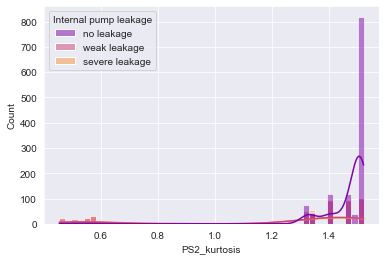

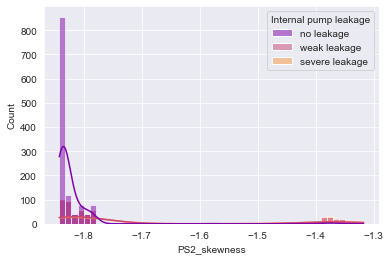

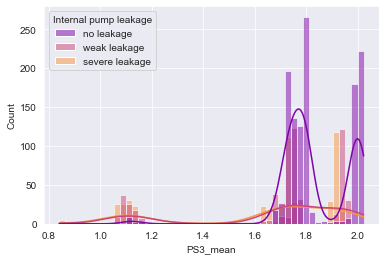

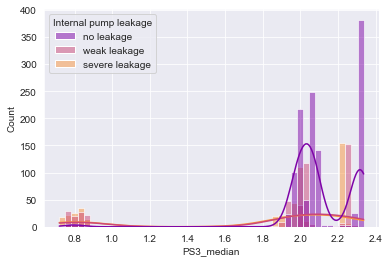

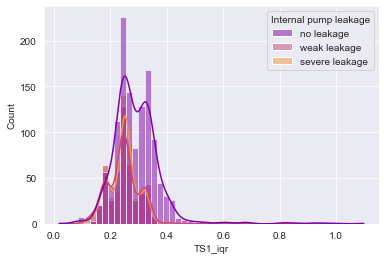

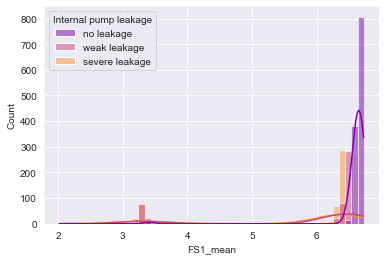

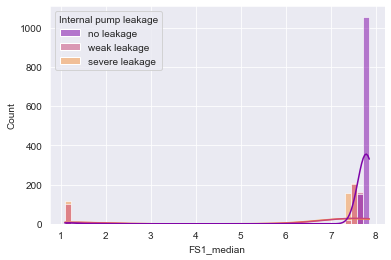

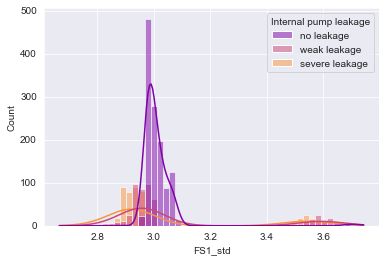

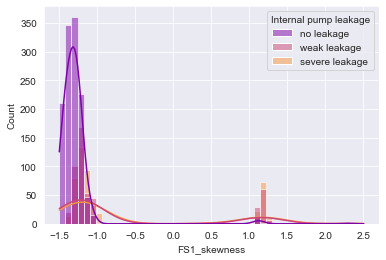

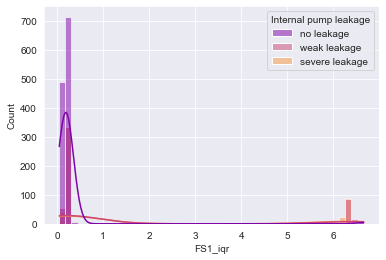

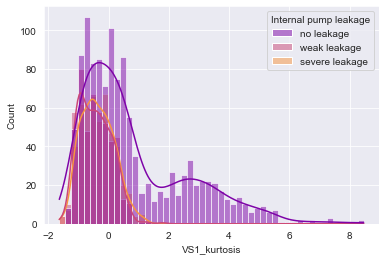

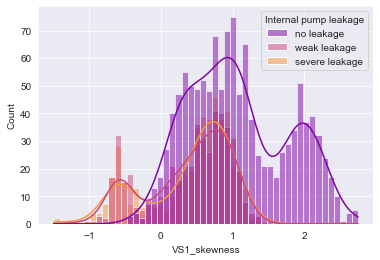

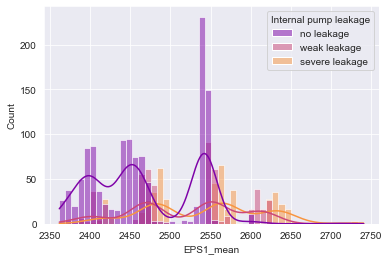

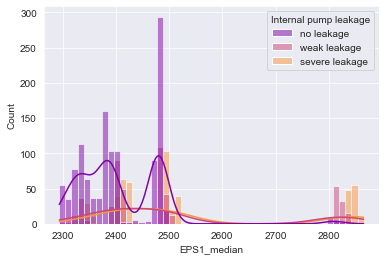

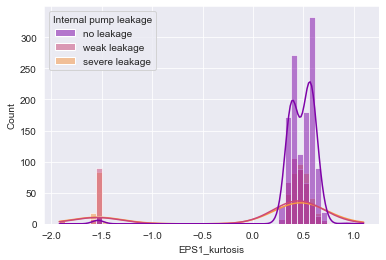

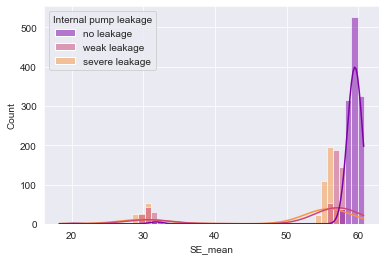

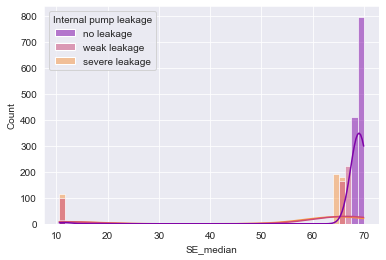

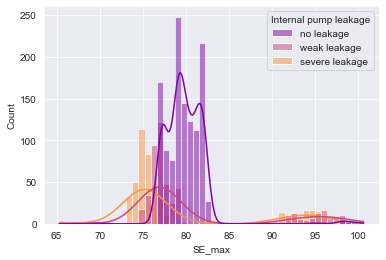

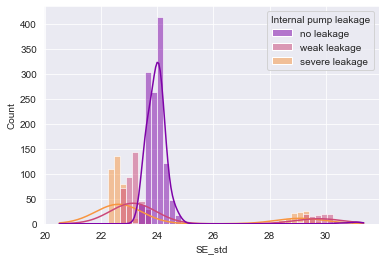

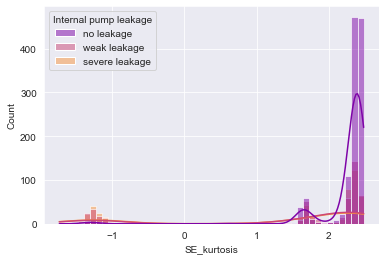

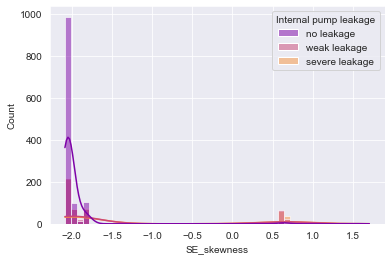

In [34]:
for i in df_pump_tau.drop('Internal pump leakage',axis=1).columns:
    sns.histplot(data=df_pump_tau,x=i,hue='Internal pump leakage',kde=True,bins=50,palette='plasma')
    plt.show()

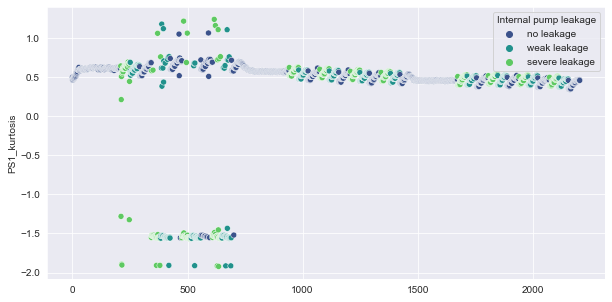

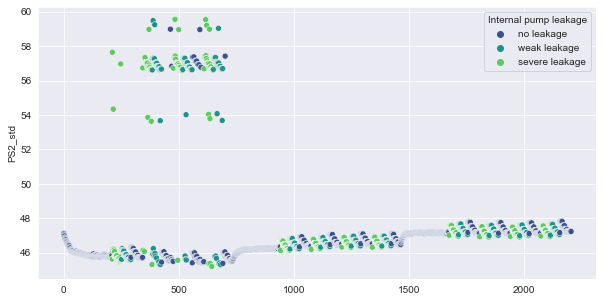

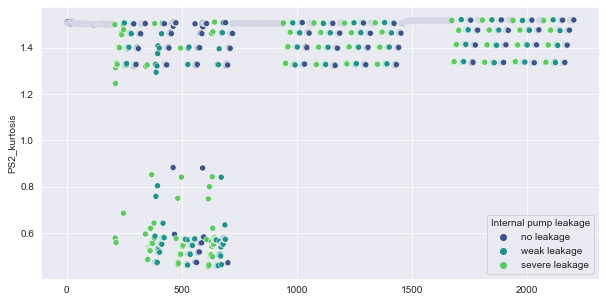

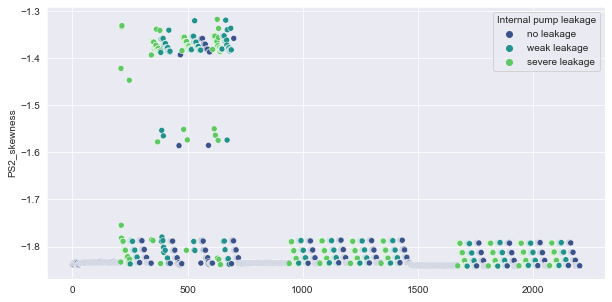

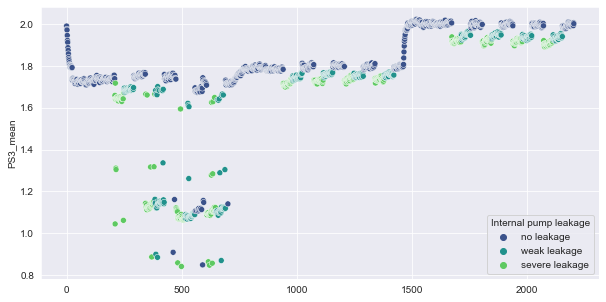

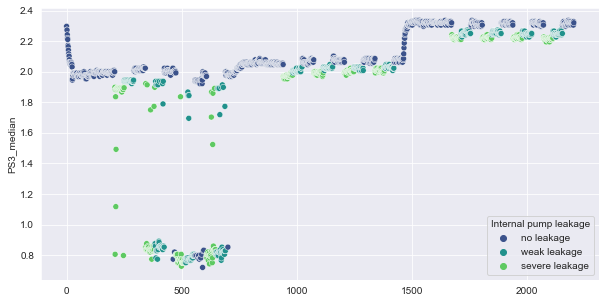

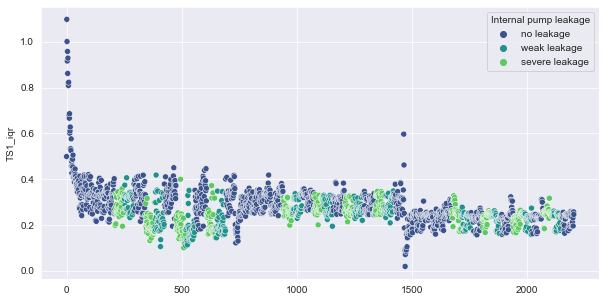

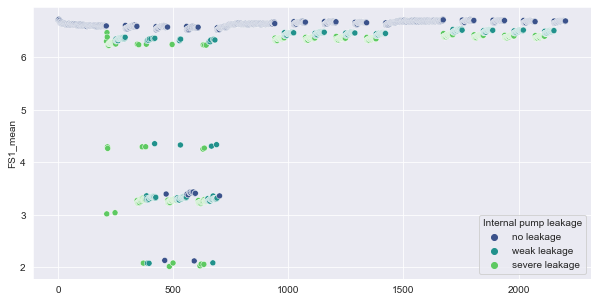

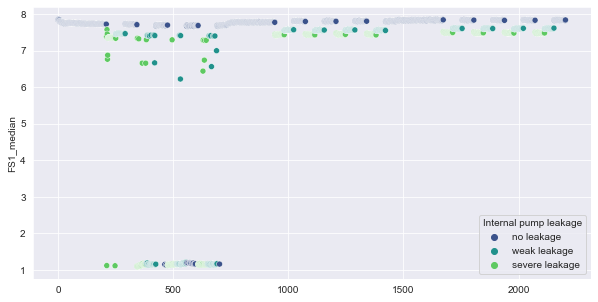

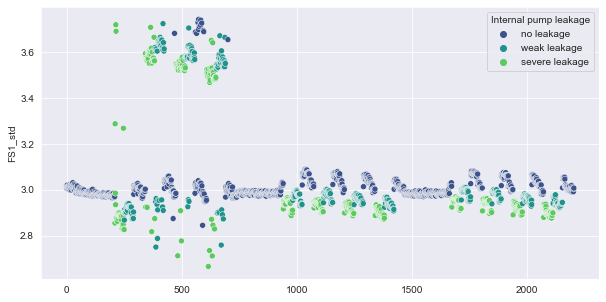

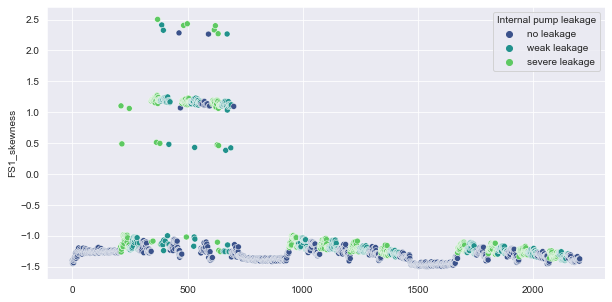

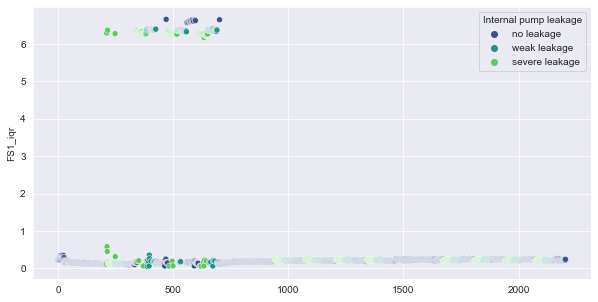

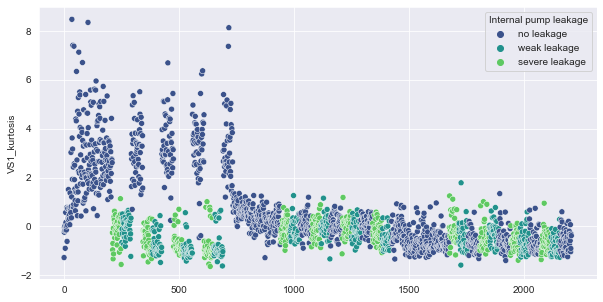

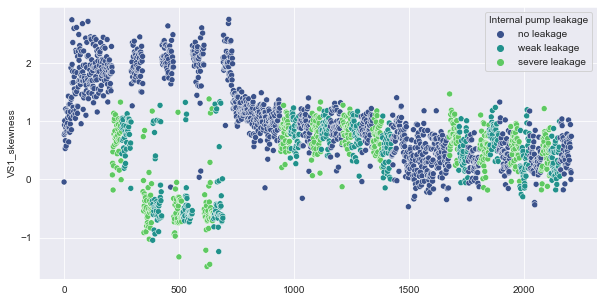

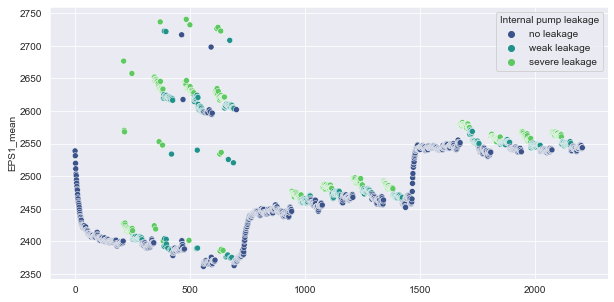

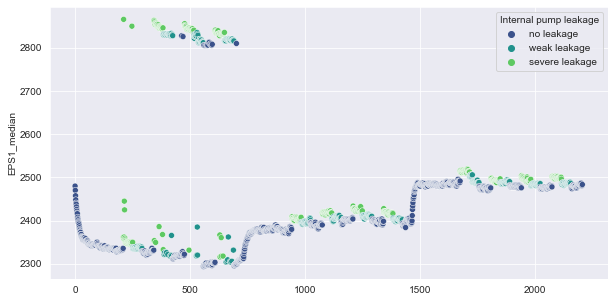

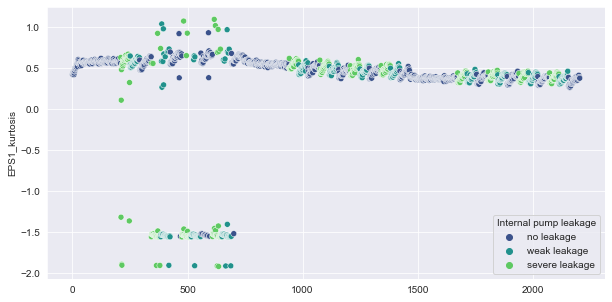

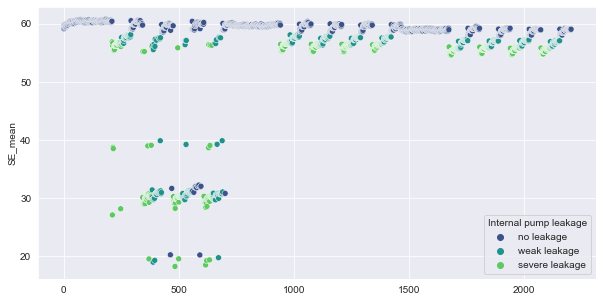

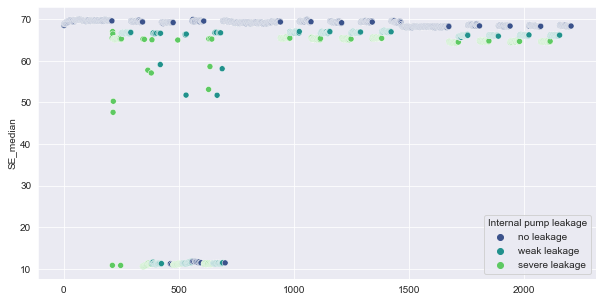

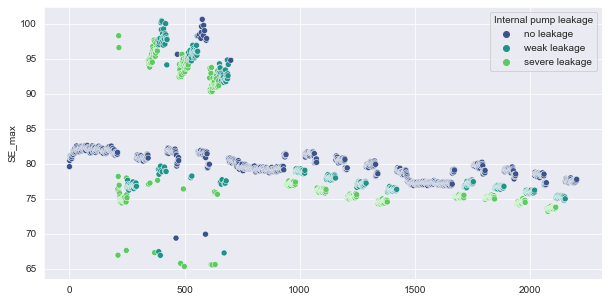

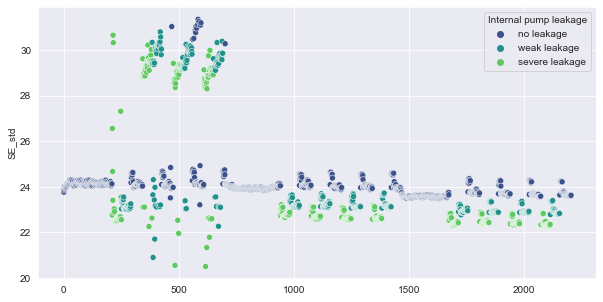

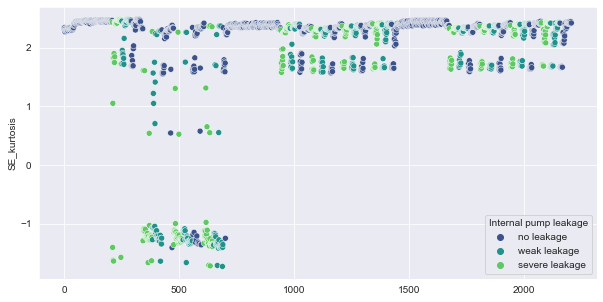

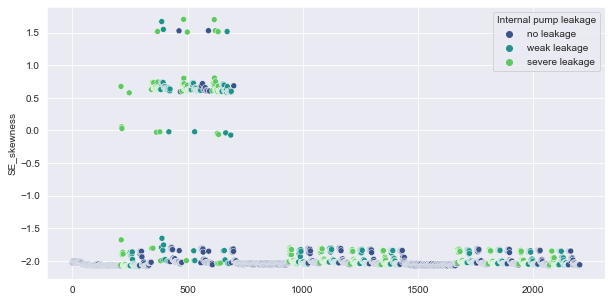

In [35]:
for i in df_pump_tau.drop('Internal pump leakage',axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df_pump_tau,y=i,x=df_pump_tau.index,hue='Internal pump leakage',palette='viridis')
    plt.show()

## Conclusion

##### 1) From visualizations above, it is difficult to set a boundary condition, Therefore using machine learning algorithms to predict the conditions can yield better results in classifying hte condition of the valve

##### 2) Features selected by ANOVA  method give the features based on volume flow rate ,motor power, pressure and efficiency factor, these features are relavent as the condition of a pump might be highly effected by the flow of hydraulic fluid , pressure,and also power. Therefore , the features based on these  sensors can be used in any classification model to build a classifier that can yield good results.

##### 3) Features selected by Kendall's method give features based on volume flow rate, pressure,motor power,and  efficiency factor, The features related to volume flow rate have strong correlation with the target and other features have greater than 0.20 , implies that they  have moderate correlation

##### Hence, it is observed that the distributions of features selected are not very well separated, and cannot be classified based on a certain boundary by visualizing the distribution plots, therefore, it is recommended to use machine learning algorithms to build a classifier for prediction.

## Using LogisticRegression

In [36]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [37]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, log_loss, confusion_matrix, classification_report

In [39]:
X,y=df_pump.drop('Internal pump leakage',axis=1),df_pump['Internal pump leakage']

In [40]:
## Mapping Defects to defective(1) or non-defective(0)
y=y.map({'no leakage':1,'weak leakage':0,'severe leakage':0})

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Internal pump leakage', ylabel='count'>

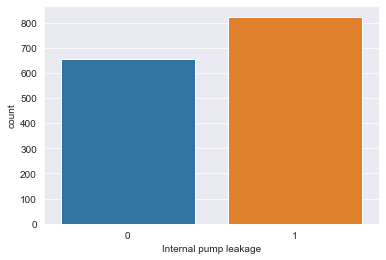

In [42]:
sns.countplot(y_train)

In [43]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr=LogisticRegression()

In [74]:
mcc_list=[]
acc_list=[]
log_list=[]
for train_idx,test_idx in cv.split(X_train,y_train):
    
    train_x,train_y=X_train.iloc[train_idx],y_train.iloc[train_idx]
    test_x,test_y=X_train.iloc[test_idx],y_train.iloc[test_idx]
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    mcc_list.append(matthews_corrcoef(test_y,pred))
    acc_list.append(accuracy_score(test_y,pred))
    log_list.append(log_loss(test_y,pred))
print(f'MCC:{np.mean(mcc_list)}')
print(f'Accuracy:{np.mean(acc_list)}')
print(f'Logloss:{np.mean(log_list)}')

C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

MCC:0.9904142814911612
Accuracy:0.9952611085661933
Logloss:0.16367659396049444


C:\Users\Sashank\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
y_hat= lr.predict(X_test)

In [76]:
mcc_score=matthews_corrcoef(y_test,y_hat)
mcc_score

0.9916873588287871

In [77]:
accuracy=accuracy_score(y_test,y_hat)
accuracy

0.9958791208791209

In [78]:
logloss=log_loss(y_test,y_hat)
logloss

0.14233231920273787

In [79]:
confusion_matrix(y_test,y_hat)

array([[328,   2],
       [  1, 397]], dtype=int64)

In [80]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       330
           1       0.99      1.00      1.00       398

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728

